Imports


In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Regular data checks(MUST)


In [170]:
df = pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [172]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [173]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [174]:
# Data Separation
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


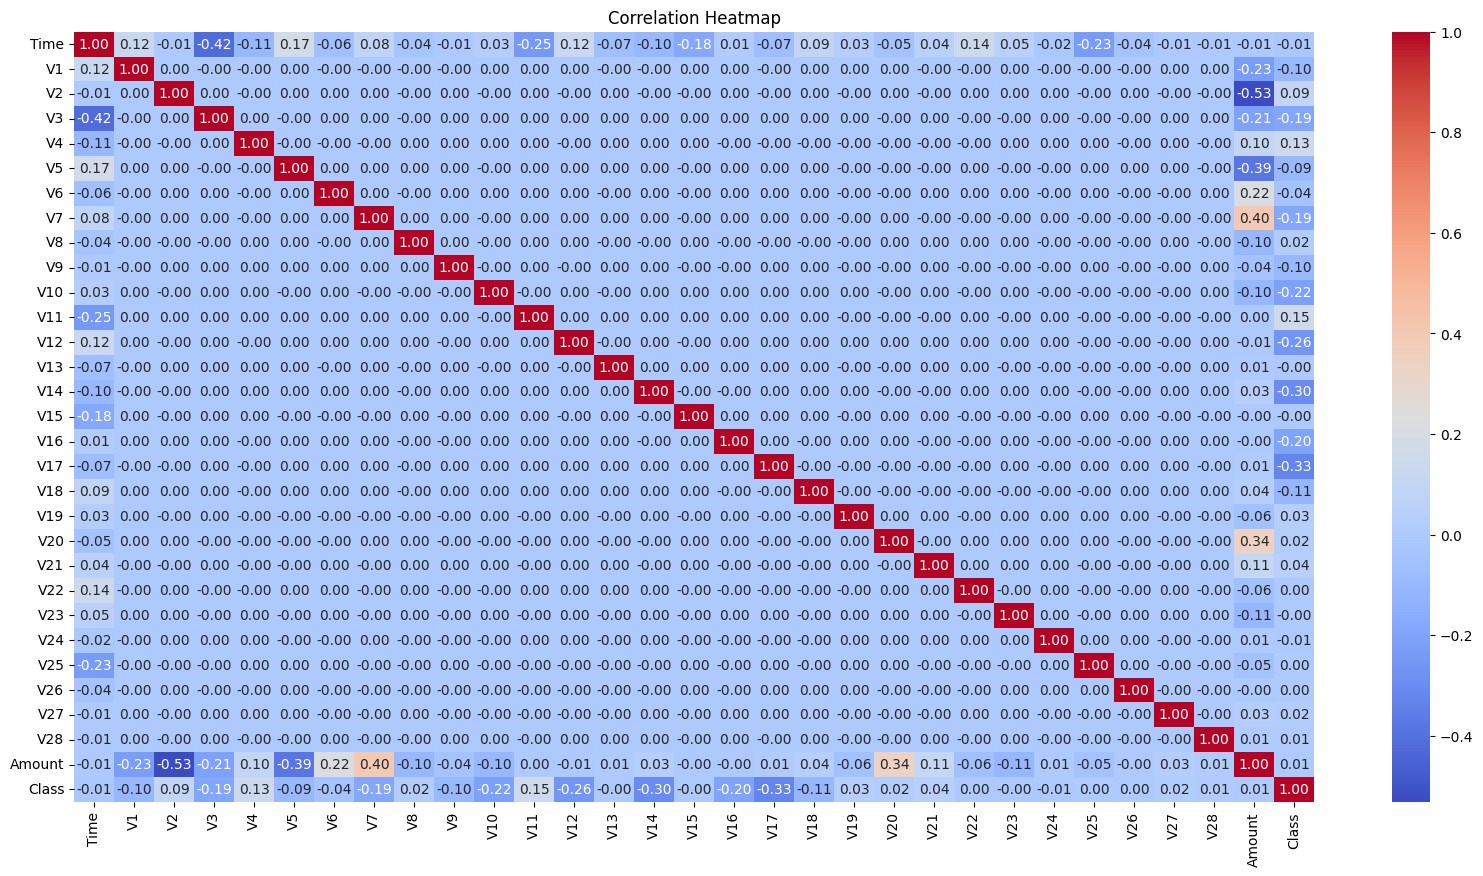

In [175]:
#Correlation Heatmap 
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

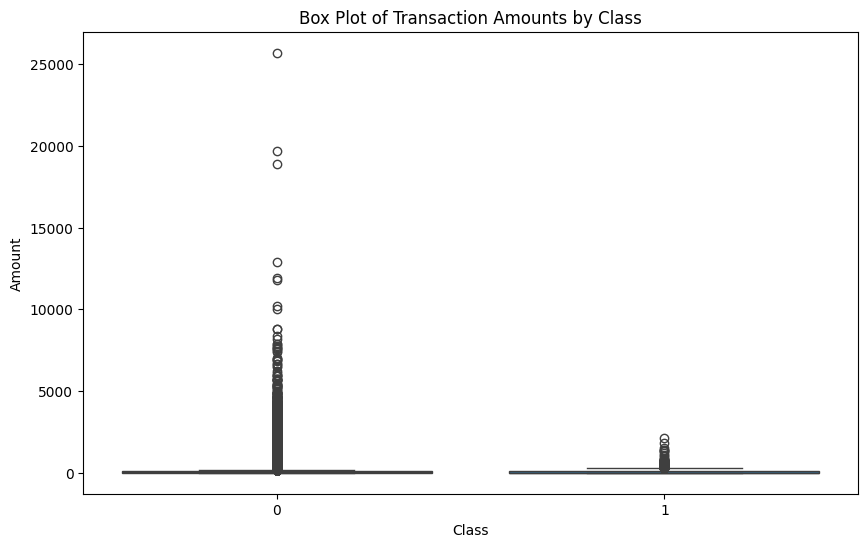

In [176]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Box Plot of Transaction Amounts by Class')
plt.show()

Data Seperation


In [177]:
#seprerate data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [178]:
legit["Amount"].describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [179]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [180]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling the data


In [181]:
#randomly selects n Number of data
legit_sample = legit.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275491,166556.0,2.084596,0.066334,-1.503444,0.206762,0.424483,-0.762059,0.265544,-0.344525,0.410004,...,0.250682,0.916624,0.011817,0.671772,0.329585,-0.135791,-0.013818,-0.050815,1.99,0
160136,113133.0,1.775445,-0.503429,-2.142246,0.221627,0.404590,-0.185430,0.056264,0.019897,0.945409,...,-0.174137,-0.660948,0.026962,-0.048280,-0.075681,-0.113407,-0.048399,-0.009951,142.76,0
44073,41782.0,-4.207461,4.127794,-1.975025,-0.126774,0.027507,2.741776,-5.594139,-12.074678,-2.720740,...,-6.267585,1.819566,0.746430,-1.499418,0.294994,0.396776,-0.624526,0.084333,0.76,0
151684,96031.0,-1.208572,0.626781,0.148638,-0.761171,0.447477,-0.024502,1.515637,-0.603191,2.236445,...,-0.188351,0.551373,-0.299806,0.631082,-0.051624,0.018774,0.054912,0.118060,163.59,0
182649,125492.0,-0.059705,-1.025520,1.276165,-2.612367,-0.650746,-0.092296,-0.972420,-0.162151,-1.006163,...,0.014079,0.641478,0.157321,0.557296,-1.601773,-0.518425,-0.096303,0.122472,6.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115988,74100.0,1.085798,-0.146481,1.137385,1.101634,-0.579804,0.783539,-0.746221,0.398286,0.652903,...,-0.003581,0.190577,-0.029410,-0.298068,0.354539,-0.376811,0.084198,0.021756,11.50,0
121716,76290.0,-0.818356,0.427917,0.100572,-0.797888,1.274505,0.536981,0.558927,-0.021149,-0.486151,...,-0.014545,0.111611,-0.086982,-1.610278,-0.361174,1.131294,-0.253385,0.106713,21.65,0
17278,28594.0,1.237350,0.210249,0.165169,0.511402,-0.260780,-0.589564,-0.106445,0.033236,-0.021487,...,-0.271938,-0.876477,0.091628,-0.070084,0.189216,0.101461,-0.035057,0.014562,0.89,0
266395,162312.0,2.039328,0.071612,-1.817612,0.226188,0.637951,-0.299415,0.055362,-0.036614,0.275121,...,-0.327084,-0.877919,0.295724,0.122454,-0.268465,0.178415,-0.065197,-0.044115,4.49,0


In [182]:
new_df = pd.concat([legit_sample, fraud],axis = 0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275491,166556.0,2.084596,0.066334,-1.503444,0.206762,0.424483,-0.762059,0.265544,-0.344525,0.410004,...,0.250682,0.916624,0.011817,0.671772,0.329585,-0.135791,-0.013818,-0.050815,1.99,0
160136,113133.0,1.775445,-0.503429,-2.142246,0.221627,0.404590,-0.185430,0.056264,0.019897,0.945409,...,-0.174137,-0.660948,0.026962,-0.048280,-0.075681,-0.113407,-0.048399,-0.009951,142.76,0
44073,41782.0,-4.207461,4.127794,-1.975025,-0.126774,0.027507,2.741776,-5.594139,-12.074678,-2.720740,...,-6.267585,1.819566,0.746430,-1.499418,0.294994,0.396776,-0.624526,0.084333,0.76,0
151684,96031.0,-1.208572,0.626781,0.148638,-0.761171,0.447477,-0.024502,1.515637,-0.603191,2.236445,...,-0.188351,0.551373,-0.299806,0.631082,-0.051624,0.018774,0.054912,0.118060,163.59,0
182649,125492.0,-0.059705,-1.025520,1.276165,-2.612367,-0.650746,-0.092296,-0.972420,-0.162151,-1.006163,...,0.014079,0.641478,0.157321,0.557296,-1.601773,-0.518425,-0.096303,0.122472,6.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [183]:
#checking value_counts to confirm we have a even distribution of data
new_df.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [184]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94801.882114,0.162711,-0.047928,0.044974,-0.011532,0.003689,-0.005780,0.016002,0.022955,0.042823,...,0.036160,-0.023057,-0.016175,-0.010555,-0.025744,0.020814,-0.003431,-0.014284,-0.012833,86.805305
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Split the Data into Feature and Target


In [185]:
X = new_df.drop(columns = 'Class', axis = 1)
Y = new_df.Class

In [186]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
275491  166556.0  2.084596  0.066334 -1.503444  0.206762  0.424483 -0.762059   
160136  113133.0  1.775445 -0.503429 -2.142246  0.221627  0.404590 -0.185430   
44073    41782.0 -4.207461  4.127794 -1.975025 -0.126774  0.027507  2.741776   
151684   96031.0 -1.208572  0.626781  0.148638 -0.761171  0.447477 -0.024502   
182649  125492.0 -0.059705 -1.025520  1.276165 -2.612367 -0.650746 -0.092296   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7         V8        V9  

In [187]:
print(Y)

275491    0
160136    0
44073     0
151684    0
182649    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data into test data and training data


In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 2)
# Displaying the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (787, 30)
X_test shape: (197, 30)
Y_train shape: (787,)
Y_test shape: (197,)


Model Training


In [189]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = []

In [190]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, Y_train)
    
    # Training accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_pred)
    
    # Test accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_pred)
    
    # ROC and AUC
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_probs)
    auc = roc_auc_score(Y_test, y_probs)
    
    results.append({
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC": auc
    })


Model Evaluation


In [191]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)

Model Performance Comparison:
                 Model  Training Accuracy  Test Accuracy       AUC
0  Logistic Regression           0.958069       0.944162  0.979489
1        Decision Tree           1.000000       0.908629  0.908576
2        Random Forest           1.000000       0.918782  0.980468
3    Gradient Boosting           1.000000       0.923858  0.983199


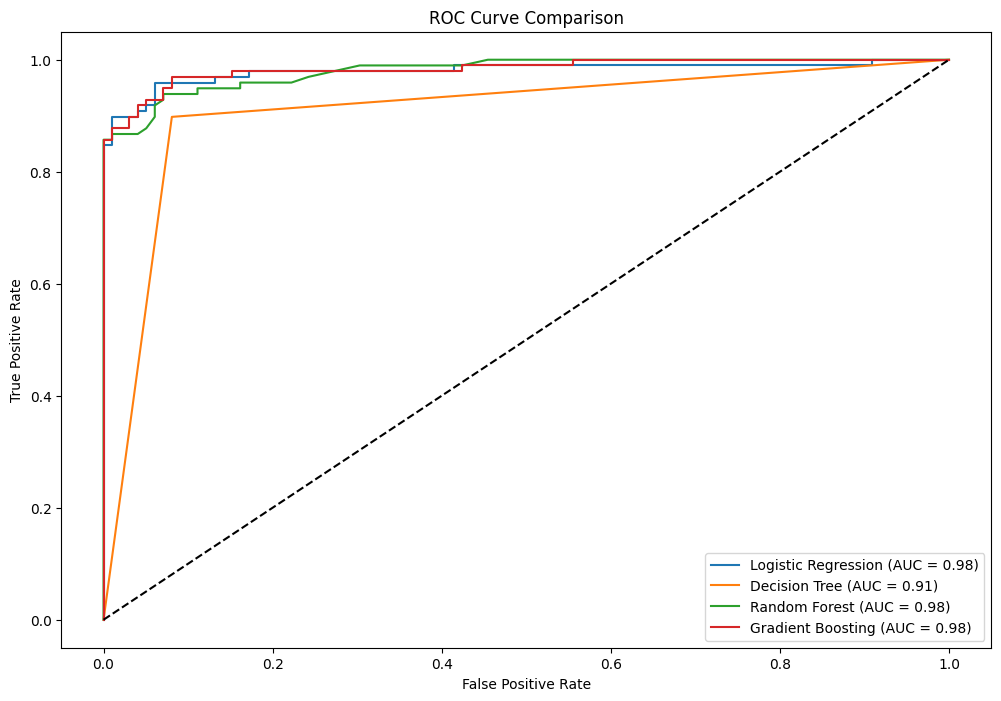

In [192]:
print("Model Performance Comparison:")
print(results_df)

# Plotting ROC curves for all models
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_probs)
    auc = roc_auc_score(Y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()